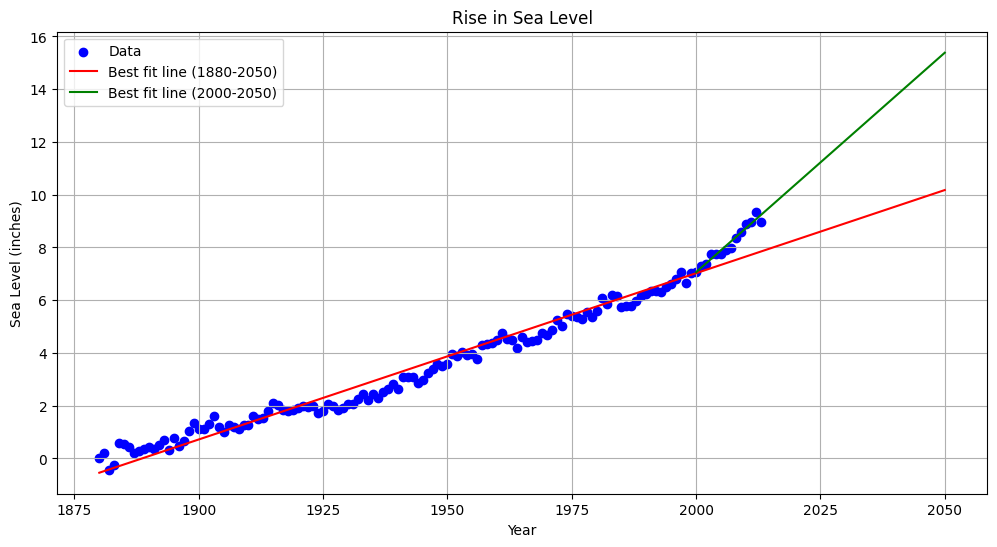

In [1]:
# Importação das bibliotecas necessárias para a análise e visualização dos dados.
import pandas as pd  # Para manipulação de dados.
import matplotlib.pyplot as plt  # Para visualização dos gráficos.
from scipy.stats import linregress  # Para cálculo de regressão linear.

# 1. Carregamento dos dados do arquivo CSV.
# Lê o arquivo 'epa-sea-level.csv' e armazena o conteúdo em um DataFrame.
df = pd.read_csv('epa-sea-level.csv')

# 2. Criação do gráfico de dispersão.
# A coluna 'Year' será usada no eixo x e 'CSIRO Adjusted Sea Level' no eixo y.
plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico.
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')  # Cria o gráfico de dispersão.

# 3. Regressão linear para todos os dados disponíveis.
# Utiliza os dados desde 1880 para calcular a linha de melhor ajuste.
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Cria anos preditivos de 1880 até 2050 para a linha de tendência.
years_extended = pd.Series([i for i in range(1880, 2051)])
# Calcula os valores da linha de regressão usando a equação y = mx + b.
sea_levels_pred = intercept + slope * years_extended
# Plota a linha de tendência no gráfico.
plt.plot(years_extended, sea_levels_pred, color='red', label='Best fit line (1880-2050)')

# 4. Regressão linear apenas para dados a partir de 2000.
# Filtra os dados para considerar apenas os anos de 2000 em diante.
df_recent = df[df['Year'] >= 2000]
# Calcula a linha de tendência para os dados filtrados.
slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(
    df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

# Cria anos preditivos de 2000 até 2050 para a nova linha de tendência.
years_recent_extended = pd.Series([i for i in range(2000, 2051)])
# Calcula os valores da nova linha de regressão.
sea_levels_recent_pred = intercept_recent + slope_recent * years_recent_extended
# Plota a nova linha de tendência no gráfico.
plt.plot(years_recent_extended, sea_levels_recent_pred, color='green', label='Best fit line (2000-2050)')

# 5. Configurações do gráfico.
# Define o título, rótulos dos eixos e legenda.
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()  # Adiciona a legenda ao gráfico.
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização.

# Salva o gráfico gerado como uma imagem PNG.
plt.savefig('sea_level_plot.png')

# Exibe o gráfico gerado.
plt.show()
